# Software Defined Network Instrusion Detection Dataset



#### Description of the Dataset:
The dataset we will use for our project is the Network Intrusion Detection System (NIDS) 2017 dataset, which is publicly available and widely used in research. The dataset was collected in a laboratory environment using the Kali Linux operating system and various attack tools such as Metasploit, Nmap, and Hping3. The dataset contains the record of real-time traffic captured daily in a tabular format. The dataset originally belongs to a Packet Capture file (PCAP) and contains 79 quantitative and qualitative features. Out of these, 1 feature represents qualitative attributes, and 78 features represent quantitative attributes.

We selected a dataset that contains the records of DDoS, XSS Intrusion, Brute Force Intrusion, SQL Injection, and benign traffic. This dataset contains 1,188,333 rows of observation of the network intrusion and whitelisted traffic along with 79 features. The count of all types of traffic is as follows:

BENIGN Traffic with 798,322 Observations
DDoS Traffic with 383,439 Observations
Web Attack Brute Force Traffic with 4,550 Observations
Web Attack XSS Traffic with 1,962 Observations
Web Attack Sql Injection Traffic with 60 Observations

Data Sources: https://www.kaggle.com/datasets/subhajournal/sdn-intrusion-detection


## Import Libraries 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from joblib import parallel_backend
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
!pip install xgboost

## Load and Preprocessing of Data


In [3]:
data = pd.read_csv("SDN_Intrusion.csv")
df = pd.DataFrame(data)
df.head(10)

Unnamed: 0   Destination Port   Flow Duration   Total Fwd Packets  \
0           0                 80         9865922                   5   
1           1                443          158423                  24   
2           2                443        61163904                  14   
3           3                443       110544045                  18   
4           4                 53             185                   2   
5           5                 53             672                   1   
6           6              51323          490655                   6   
7           7                 53          163154                   2   
8           8                 80         1875517                   3   
9           9                 53           23800                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           30   
1                       22                          703   
2                       12                          993   
3                       18                         1213   
4                        2                          104   
5                        1                           79   
6                        2                        11607   
7                        2                           70   
8                        6                           26   
9                        2                           64   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                         24564                     453   
2                          3445                     620   
3                          4216                     812   
4                           136                      52   
5                           161                      79   
6                            26                    5840   
7                           168                      35   
8                         11601                      20   
9                            96                      32   

    Fwd Packet Length Min   Fwd Packet Length Mean  ...  \
0                       6                 6.000000  ...   
1                       0                29.291667  ...   
2                       0                70.928571  ...   
3                       0                67.388889  ...   
4                      52                52.000000  ...   
5                      79                79.000000  ...   
6                       0              1934.500000  ...   
7                      35                35.000000  ...   
8                       0                 8.666667  ...   
9                      32                32.000000  ...   

    min_seg_size_forward   Active Mean   Active Std   Active Max   Active Min  \
0                     20    1986.00000       0.0000         1986         1986   
1                     32       0.00000       0.0000            0            0   
2                     20  147216.66670  152989.5108       459505        84515   
3                     20   75305.72727  133115.4997       476664        35046   
4                     20       0.00000       0.0000            0            0   
5                     32       0.00000       0.0000            0            0   
6                     20       0.00000       0.0000            0            0   
7                     32       0.00000       0.0000            0            0   
8                     20       0.00000       0.0000            0            0   
9                     40       0.00000       0.0000            0            0   

      Idle Mean     Idle Std   Idle Max   Idle Min   Class  
0  9.863936e+06      0.00000    9863936    9863936    DDoS  
1  0.000000e+00      0.00000          0          0  BENIGN  
2  1.000000e+07  21747.04690   10100000    9999779  BENIGN  
3  9.970950e+06  80601.91884   10000000    9728297  BENIGN  
4  0.000000e+00      0.00000          0          0  BENIGN  
5 

### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188333 entries, 0 to 1188332
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1188333 non-null  int64  
 1    Destination Port             1188333 non-null  int64  
 2    Flow Duration                1188333 non-null  int64  
 3    Total Fwd Packets            1188333 non-null  int64  
 4    Total Backward Packets       1188333 non-null  int64  
 5   Total Length of Fwd Packets   1188333 non-null  int64  
 6    Total Length of Bwd Packets  1188333 non-null  int64  
 7    Fwd Packet Length Max        1188333 non-null  int64  
 8    Fwd Packet Length Min        1188333 non-null  int64  
 9    Fwd Packet Length Mean       1188333 non-null  float64
 10   Fwd Packet Length Std        1188333 non-null  float64
 11  Bwd Packet Length Max         1188333 non-null  int64  
 12   Bwd Packet Length Min      

In [5]:
df['Class'].unique()

array(['DDoS', 'BENIGN', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection'], dtype=object)

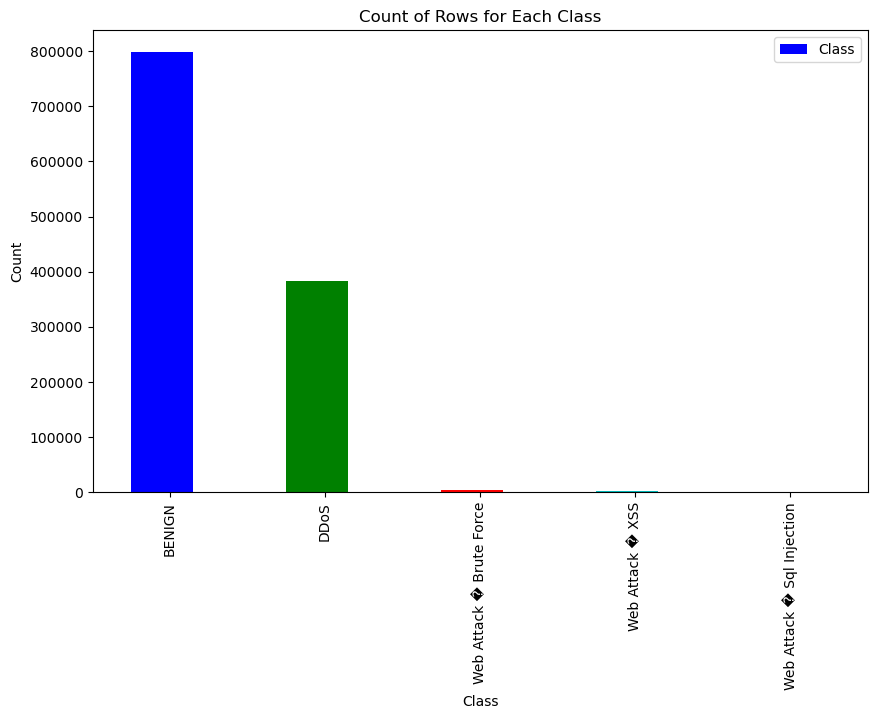

In [6]:
counts = df['Class'].value_counts()
# # plt.figure(figsize=(8, 6))

# # # set the color, marker style and size for each class
# # colors = ['b', 'g', 'r', 'c', 'm']
# # markers = ['o', 's', 'D', '*', 'p']
# # sizes = [100, 150, 200, 250, 300]

# # # loop through each class and plot the count
# # for i, cls in enumerate(df['Class'].unique()):
# #     count = df['Class'].value_counts()[cls]
# #     plt.scatter(cls, count, color=colors[i], marker=markers[i], s=sizes[i], label=cls)

# # # add x and y axis labels and title
# # plt.xlabel('Class')
# # plt.ylabel('Count')
# # plt.title('Count of Rows for Each Class')

# # # add legend
# # plt.legend()

# # # display the plot
# # plt.show()

# counts.plot(kind='bar')
# plt.show()
# plt.tight_layout()

ax = counts.plot(kind='bar', color=['b', 'g', 'r', 'c', 'm'])

# adjust the figure size
fig = plt.gcf()
fig.set_size_inches(10, 6)

# adjust the width of the bars
for patch in ax.patches:
    patch.set_width(0.4)



# add x and y axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Rows for Each Class')

# add legend
plt.legend()

# display the plot
plt.show()






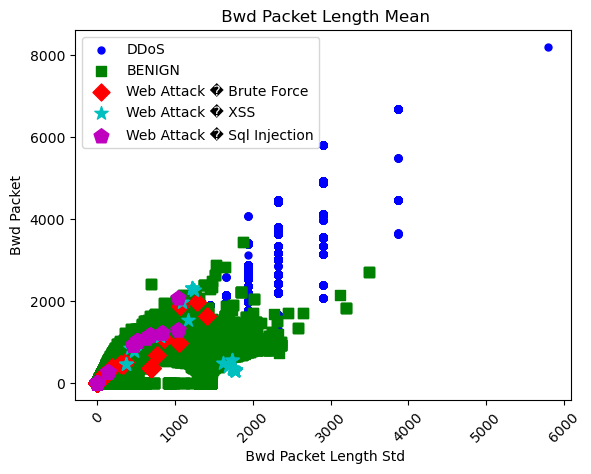

In [7]:
import matplotlib.pyplot as plt

# set the color, marker style and size for each class
colors = ['b', 'g', 'r', 'c', 'm']
markers = ['o', 's', 'D', '*', 'p']
sizes = [25, 50, 75, 100, 125]

# loop through each class and plot the backward packets
for i, cls in enumerate(df['Class'].unique()):
    subset = df[df['Class'] == cls]
   
    plt.scatter(subset[' Bwd Packet Length Mean'],subset[' Bwd Packet Length Std'], color=colors[i], marker=markers[i], s=sizes[i], label=cls)

# add x and y axis labels and title
plt.ylabel('Bwd Packet')
plt.xlabel(' Bwd Packet Length Std')
plt.title(' Bwd Packet Length Mean')
plt.xticks(rotation = 45)
# add legend
plt.legend(fontsize = 10)

# display the plot
plt.show()







### Determine columns containing nulls

In [8]:
#Dropping missing rows
df.dropna(inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

Destination Port   Flow Duration   Total Fwd Packets  \
0                       80         9865922                   5   
1                      443          158423                  24   
2                      443        61163904                  14   
3                      443       110544045                  18   
4                       53             185                   2   
...                    ...             ...                 ...   
1188328                138              23                  13   
1188329              50898         7188897                   1   
1188330                 53             153                   2   
1188331                 80         1868954                   6   
1188332                 80       109749628                   5   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           30   
1                             22                          703   
2                             12                          993   
3                             18                         1213   
4                              2                          104   
...                          ...                          ...   
1188328                        0                         3029   
1188329                        5                            6   
1188330                        2                           46   
1188331                        0                           36   
1188332                        3                          152   

          Total Length of Bwd Packets   Fwd Packet Length Max  \
0                                   0                       6   
1                               24564                     453   
2                                3445                     620   
3                                4216                     812   
4                                 136                      52   
...                               ...                     ...   
1188328                             0                     233   
1188329                            30                       6   
1188330                            46                      23   
1188331                             0                       6   
1188332                          1618                     134   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                 6.000000   
1                             0                29.291667   
2                             0                70.928571   
3                             0                67.388889   
4                            52                52.000000   
...                         ...                      ...   
1188328                     233               233.000000   
1188329                       6                 6.000000   
1188330                      23                23.000000   
1188331                       6                 6.000000   
1188332                       0                30.400000   

          Fwd Packet Length Std  ...   min_seg_size_forward   Active Mean  \
0                      0.000000  ...                     20    1986.00000   
1                     96.131015  ...                     32       0.00000   
2                    167.601388  ...                     20  147216.66670   
3                    192.927032  ...                     20   75305.72727   
4                      0.000000  ...                     20       0.00000   
...                         ...  ...                    ...           ...   
1188328                0.000000  ...                     20       0.00000   
1188329                0.000000  ...                     20   10378.00000   
1188330                0.000000  ...                     32       0.00000   
1188331                0.000000  ...                     20       0.00000   
1188332               57.972407  ...                     20       0.00000   

         

In [9]:
df.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       1.188262e+06    1.188262e+06        1.188262e+06   
mean        8.478802e+03    1.462267e+07        9.596698e+00   
std         1.914945e+04    3.176084e+07        7.448448e+02   
min         0.000000e+00   -1.000000e+00        1.000000e+00   
25%         5.300000e+01    1.682200e+04        2.000000e+00   
50%         8.000000e+01    2.794140e+05        3.000000e+00   
75%         4.430000e+02    6.103860e+06        5.000000e+00   
max         6.553200e+04    1.200000e+08        2.007550e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             1.188262e+06                 1.188262e+06   
mean              1.078163e+01                 7.843480e+02   
std               9.896378e+02                 5.758321e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 2.600000e+01   
50%               2.000000e+00                 4.800000e+01   
75%               5.000000e+00                 9.000000e+01   
max               2.706860e+05                 1.197199e+06   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  1.188262e+06            1.188262e+06   
mean                   1.796370e+04            3.815087e+02   
std                    2.292657e+06            1.456703e+03   
min                    0.000000e+00            0.000000e+00   
25%                    6.000000e+00            6.000000e+00   
50%                    1.410000e+02            2.000000e+01   
75%                    5.524000e+03            4.800000e+01   
max                    6.270000e+08            2.336000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            1.188262e+06             1.188262e+06   
mean             2.582334e+01             1.154458e+02   
std              1.267425e+02             3.919321e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              6.000000e+00             8.800000e+00   
75%              3.200000e+01             4.500000e+01   
max              1.729000e+03             4.183057e+03   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            1.188262e+06  ...       1.188262e+06           1.188262e+06   
mean             1.437167e+02  ...       7.304974e+00           2.325000e+01   
std              6.168558e+02  ...       7.145060e+02           5.600714e+00   
min              0.000000e+00  ...       0.000000e+00           0.000000e+00   
25%              0.000000e+00  ...       1.000000e+00           2.000000e+01   
50%              0.000000e+00  ...       2.000000e+00           2.000000e+01   
75%              1.026320e+01  ...       4.000000e+00           3.200000e+01   
max              6.692645e+03  ...       1.924910e+05           6.000000e+01   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  1.188262e+06  1.188262e+06  1.188262e+06  1.188262e+06  1.188262e+06   
mean   1.371641e+05  2.729254e+04  1.888877e+05  1.226808e+05  7.470800e+06   
std    7.065135e+05  2.821370e+05  9.177177e+05  6.787313e+05  1.885727e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    8.930000e+02  0.000000e+00  8.930000e+02  8.760000e+02  5.921868e+06   
max    1.030000e+08  6.370000e+07  1.030000e+08  1.030000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  1.188262e+06  1.188262e+06  1.188262e+06  
mean   2.118840e+06  8.970755e+06  5.941346e+06  
std    9.859717e+06  2.256655e+07  1.730284e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

## Feature Selection 

### Encode the target column i.e Class

In [10]:
#Encoding the Class labels to numerical values to calculate correlation
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df

Destination Port   Flow Duration   Total Fwd Packets  \
0                       80         9865922                   5   
1                      443          158423                  24   
2                      443        61163904                  14   
3                      443       110544045                  18   
4                       53             185                   2   
...                    ...             ...                 ...   
1188328                138              23                  13   
1188329              50898         7188897                   1   
1188330                 53             153                   2   
1188331                 80         1868954                   6   
1188332                 80       109749628                   5   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           30   
1                             22                          703   
2                             12                          993   
3                             18                         1213   
4                              2                          104   
...                          ...                          ...   
1188328                        0                         3029   
1188329                        5                            6   
1188330                        2                           46   
1188331                        0                           36   
1188332                        3                          152   

          Total Length of Bwd Packets   Fwd Packet Length Max  \
0                                   0                       6   
1                               24564                     453   
2                                3445                     620   
3                                4216                     812   
4                                 136                      52   
...                               ...                     ...   
1188328                             0                     233   
1188329                            30                       6   
1188330                            46                      23   
1188331                             0                       6   
1188332                          1618                     134   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                 6.000000   
1                             0                29.291667   
2                             0                70.928571   
3                             0                67.388889   
4                            52                52.000000   
...                         ...                      ...   
1188328                     233               233.000000   
1188329                       6                 6.000000   
1188330                      23                23.000000   
1188331                       6                 6.000000   
1188332                       0                30.400000   

          Fwd Packet Length Std  ...   min_seg_size_forward   Active Mean  \
0                      0.000000  ...                     20    1986.00000   
1                     96.131015  ...                     32       0.00000   
2                    167.601388  ...                     20  147216.66670   
3                    192.927032  ...                     20   75305.72727   
4                      0.000000  ...                     20       0.00000   
...                         ...  ...                    ...           ...   
1188328                0.000000  ...                     20       0.00000   
1188329                0.000000  ...                     20   10378.00000   
1188330                0.000000  ...                     32       0.00000   
1188331                0.000000  ...                     20       0.00000   
1188332               57.972407  ...                     20       0.00000   

         

### Examine Correlation of Features

In [11]:
corr_matrix_class=df.corr()['Class']

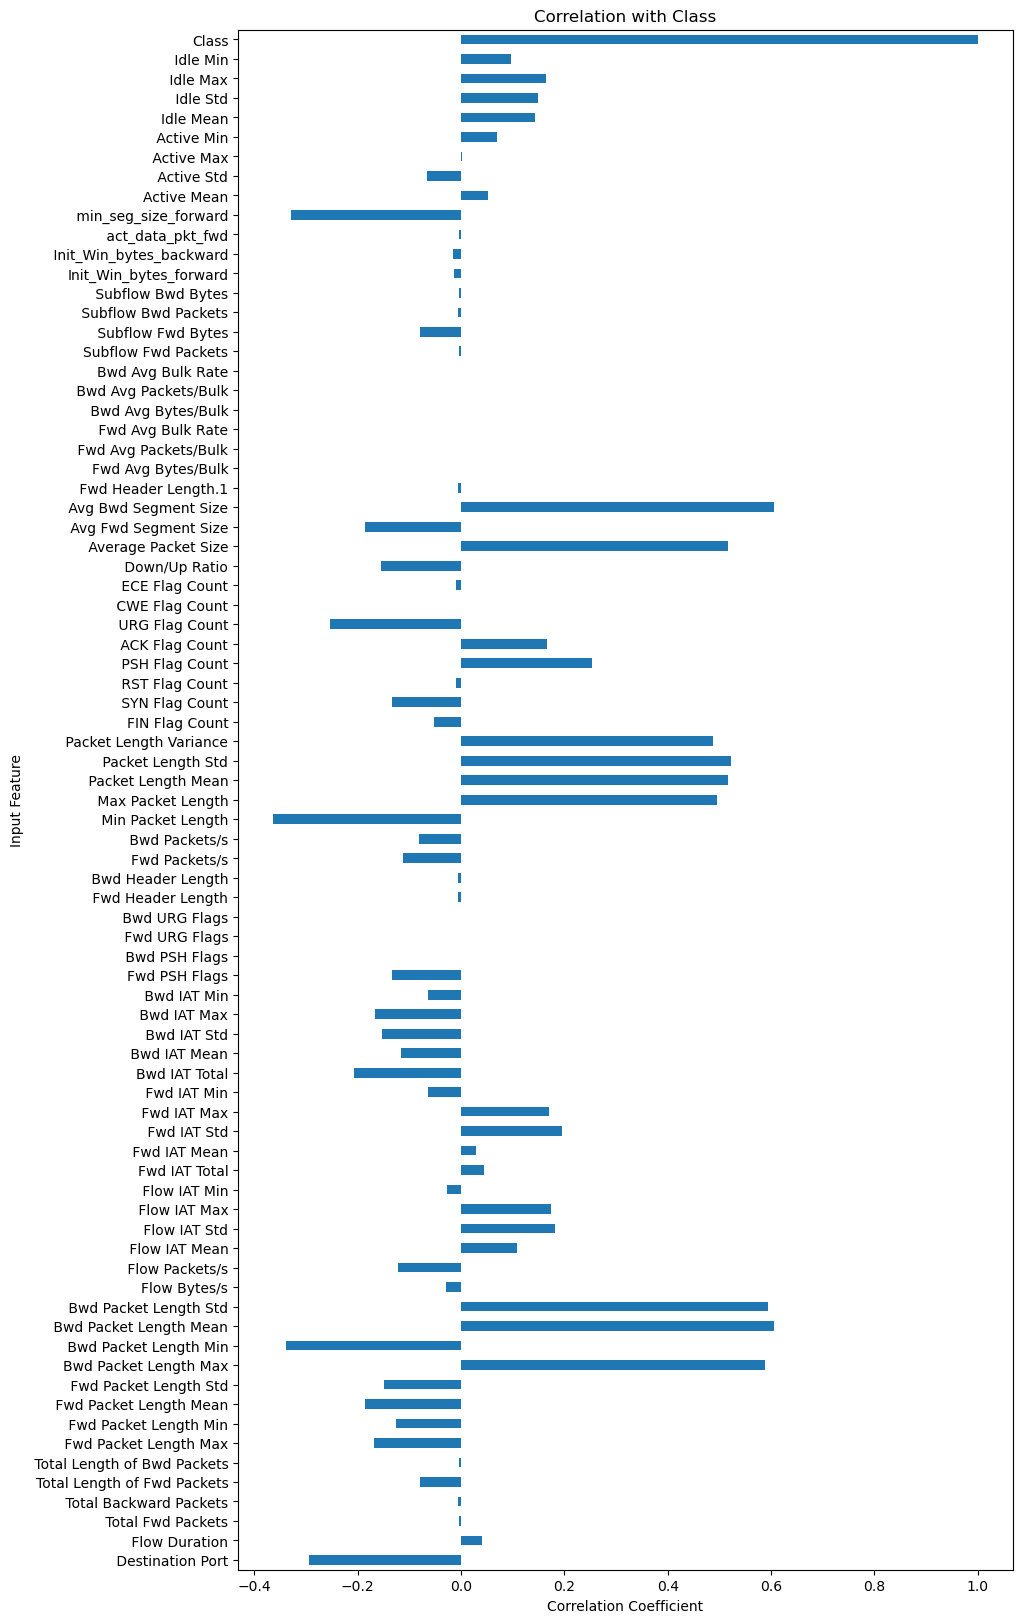

In [12]:
fig, ax = plt.subplots(figsize=(10, 20))
corr_matrix_class.plot(kind='barh', ax=ax)
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Input Feature')
ax.set_title(f'Correlation with Class')
plt.show()

### Dropping Columns which are highly correlated

In [13]:
# # Compute the correlation matrix
corr_matrix_abs = df.corr().abs()

# Find highly correlated features
high_corr_features = set()
for i, j in zip(*np.where(corr_matrix_abs > 0.8)):
    if i != j:
        high_corr_features.add(df.columns[j])

# Remove highly correlated features from the DataFrame
df.drop(high_corr_features, axis=1, inplace=True)
print(df.columns)

# corr_matrix_class=df.corr()['Class']

# corr_threshold = 0.8

# high_corr_cols = corr_matrix_class[abs(corr_matrix_class) > corr_threshold].index.tolist()

# df = df.drop(high_corr_cols, axis=1)
# df.columns

Index([' Destination Port', ' Fwd Packet Length Min', ' Bwd Packet Length Min',
       'Flow Bytes/s', ' Flow IAT Min', 'Bwd IAT Total', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Bwd Packets/s',
       ' Min Packet Length', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Active Std',
       ' Idle Std', 'Class'],
      dtype='object')


## Visualization of Correlation Matrix

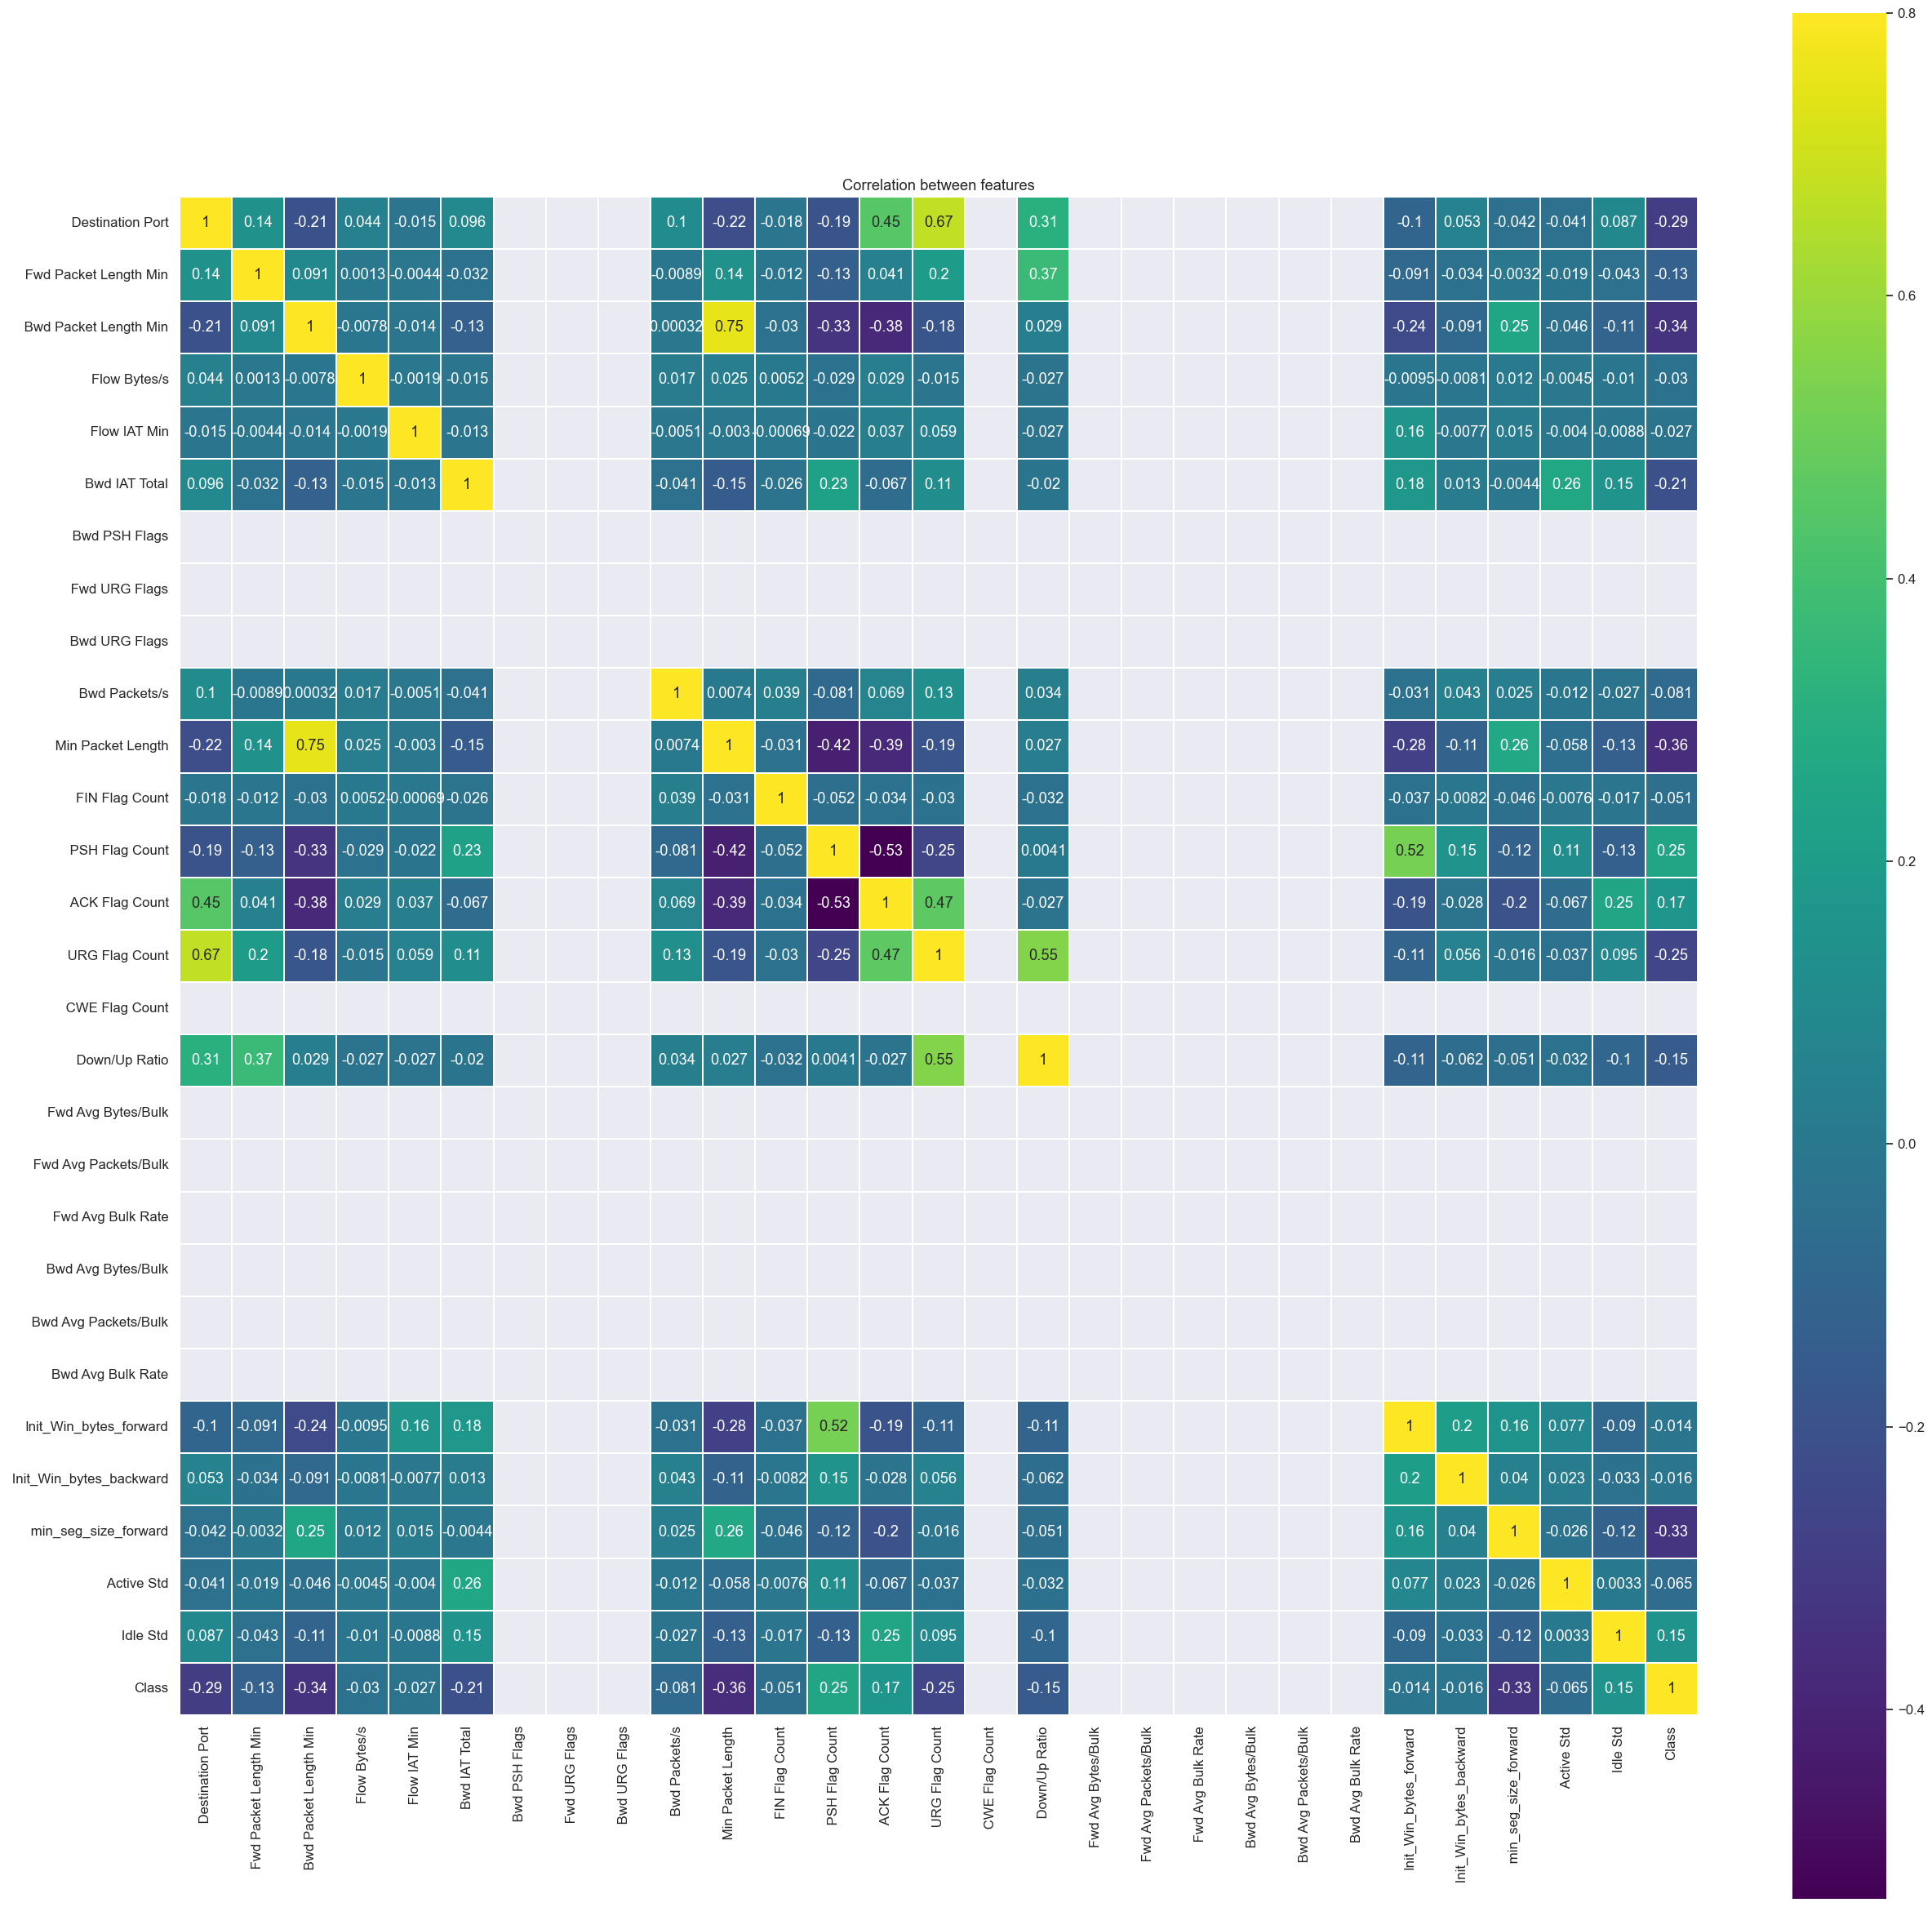

In [15]:
corr_matrix = df.corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(30, 30))

sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [16]:
df.columns

Index([' Destination Port', ' Fwd Packet Length Min', ' Bwd Packet Length Min',
       'Flow Bytes/s', ' Flow IAT Min', 'Bwd IAT Total', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Bwd Packets/s',
       ' Min Packet Length', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count',
       ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' min_seg_size_forward', ' Active Std',
       ' Idle Std', 'Class'],
      dtype='object')

### Dropping columns which are not affecting target

In [17]:
df.drop([' Bwd PSH Flags',' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk',
       ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate'], axis = 1,inplace = True)

In [18]:
df

Destination Port   Fwd Packet Length Min   Bwd Packet Length Min  \
0                       80                       6                       0   
1                      443                       0                       0   
2                      443                       0                       0   
3                      443                       0                       0   
4                       53                      52                      68   
...                    ...                     ...                     ...   
1188328                138                     233                       0   
1188329              50898                       6                       6   
1188330                 53                      23                      23   
1188331                 80                       6                       0   
1188332                 80                       0                       0   

         Flow Bytes/s   Flow IAT Min  Bwd IAT Total   Bwd Packets/s  \
0        3.040770e+00              3              0        0.000000   
1        1.594907e+05              1         120711      138.868725   
2        7.255914e+01             63       61100000        0.196194   
3        4.911165e+01             19      111000000        0.162831   
4        1.297297e+06              3             49    10810.810810   
...               ...            ...            ...             ...   
1188328  1.320000e+08              1              0        0.000000   
1188329  5.007722e+00              1        7188843        0.695517   
1188330  6.013072e+05              1              1    13071.895420   
1188331  1.926211e+01              1              0        0.000000   
1188332  1.612762e+01             15          24492        0.027335   

          Min Packet Length  FIN Flag Count   PSH Flag Count   ACK Flag Count  \
0                         6               0                0                1   
1                         0               0                1                0   
2                         0               0                1                0   
3                         0               0                1                0   
4                        52               0                0                0   
...                     ...             ...              ...              ...   
1188328                 233               0                0                0   
1188329                   6               0                0                1   
1188330                  23               0                0                0   
1188331                   6               0                0                1   
1188332                   0               0                1                0   

          URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
0                      0               0                     256   
1                      0               0                   65535   
2                      0               0                    8192   
3                      0               1                    8192   
4                      0               1                      -1   
...                  ...             ...                     ...   
1188328                0               0                      -1   
1188329                1               5                     229   
1188330                0               1                      -1   
1188331                0               0                     256   
1188332                0               0                   65535   

          Init_Win_bytes_backward   min_seg_size_forward   Active Std  \
0                              -1                     20       0.0000   
1                             349                     32       0.0000   
2                             115                     20  152989.5108   
3                              63                     20  133115.4997   
4                              -1                     20       0.

In [19]:
df.columns

Index([' Destination Port', ' Fwd Packet Length Min', ' Bwd Packet Length Min',
       'Flow Bytes/s', ' Flow IAT Min', 'Bwd IAT Total', ' Bwd Packets/s',
       ' Min Packet Length', 'FIN Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', ' Active Std', ' Idle Std', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between features')

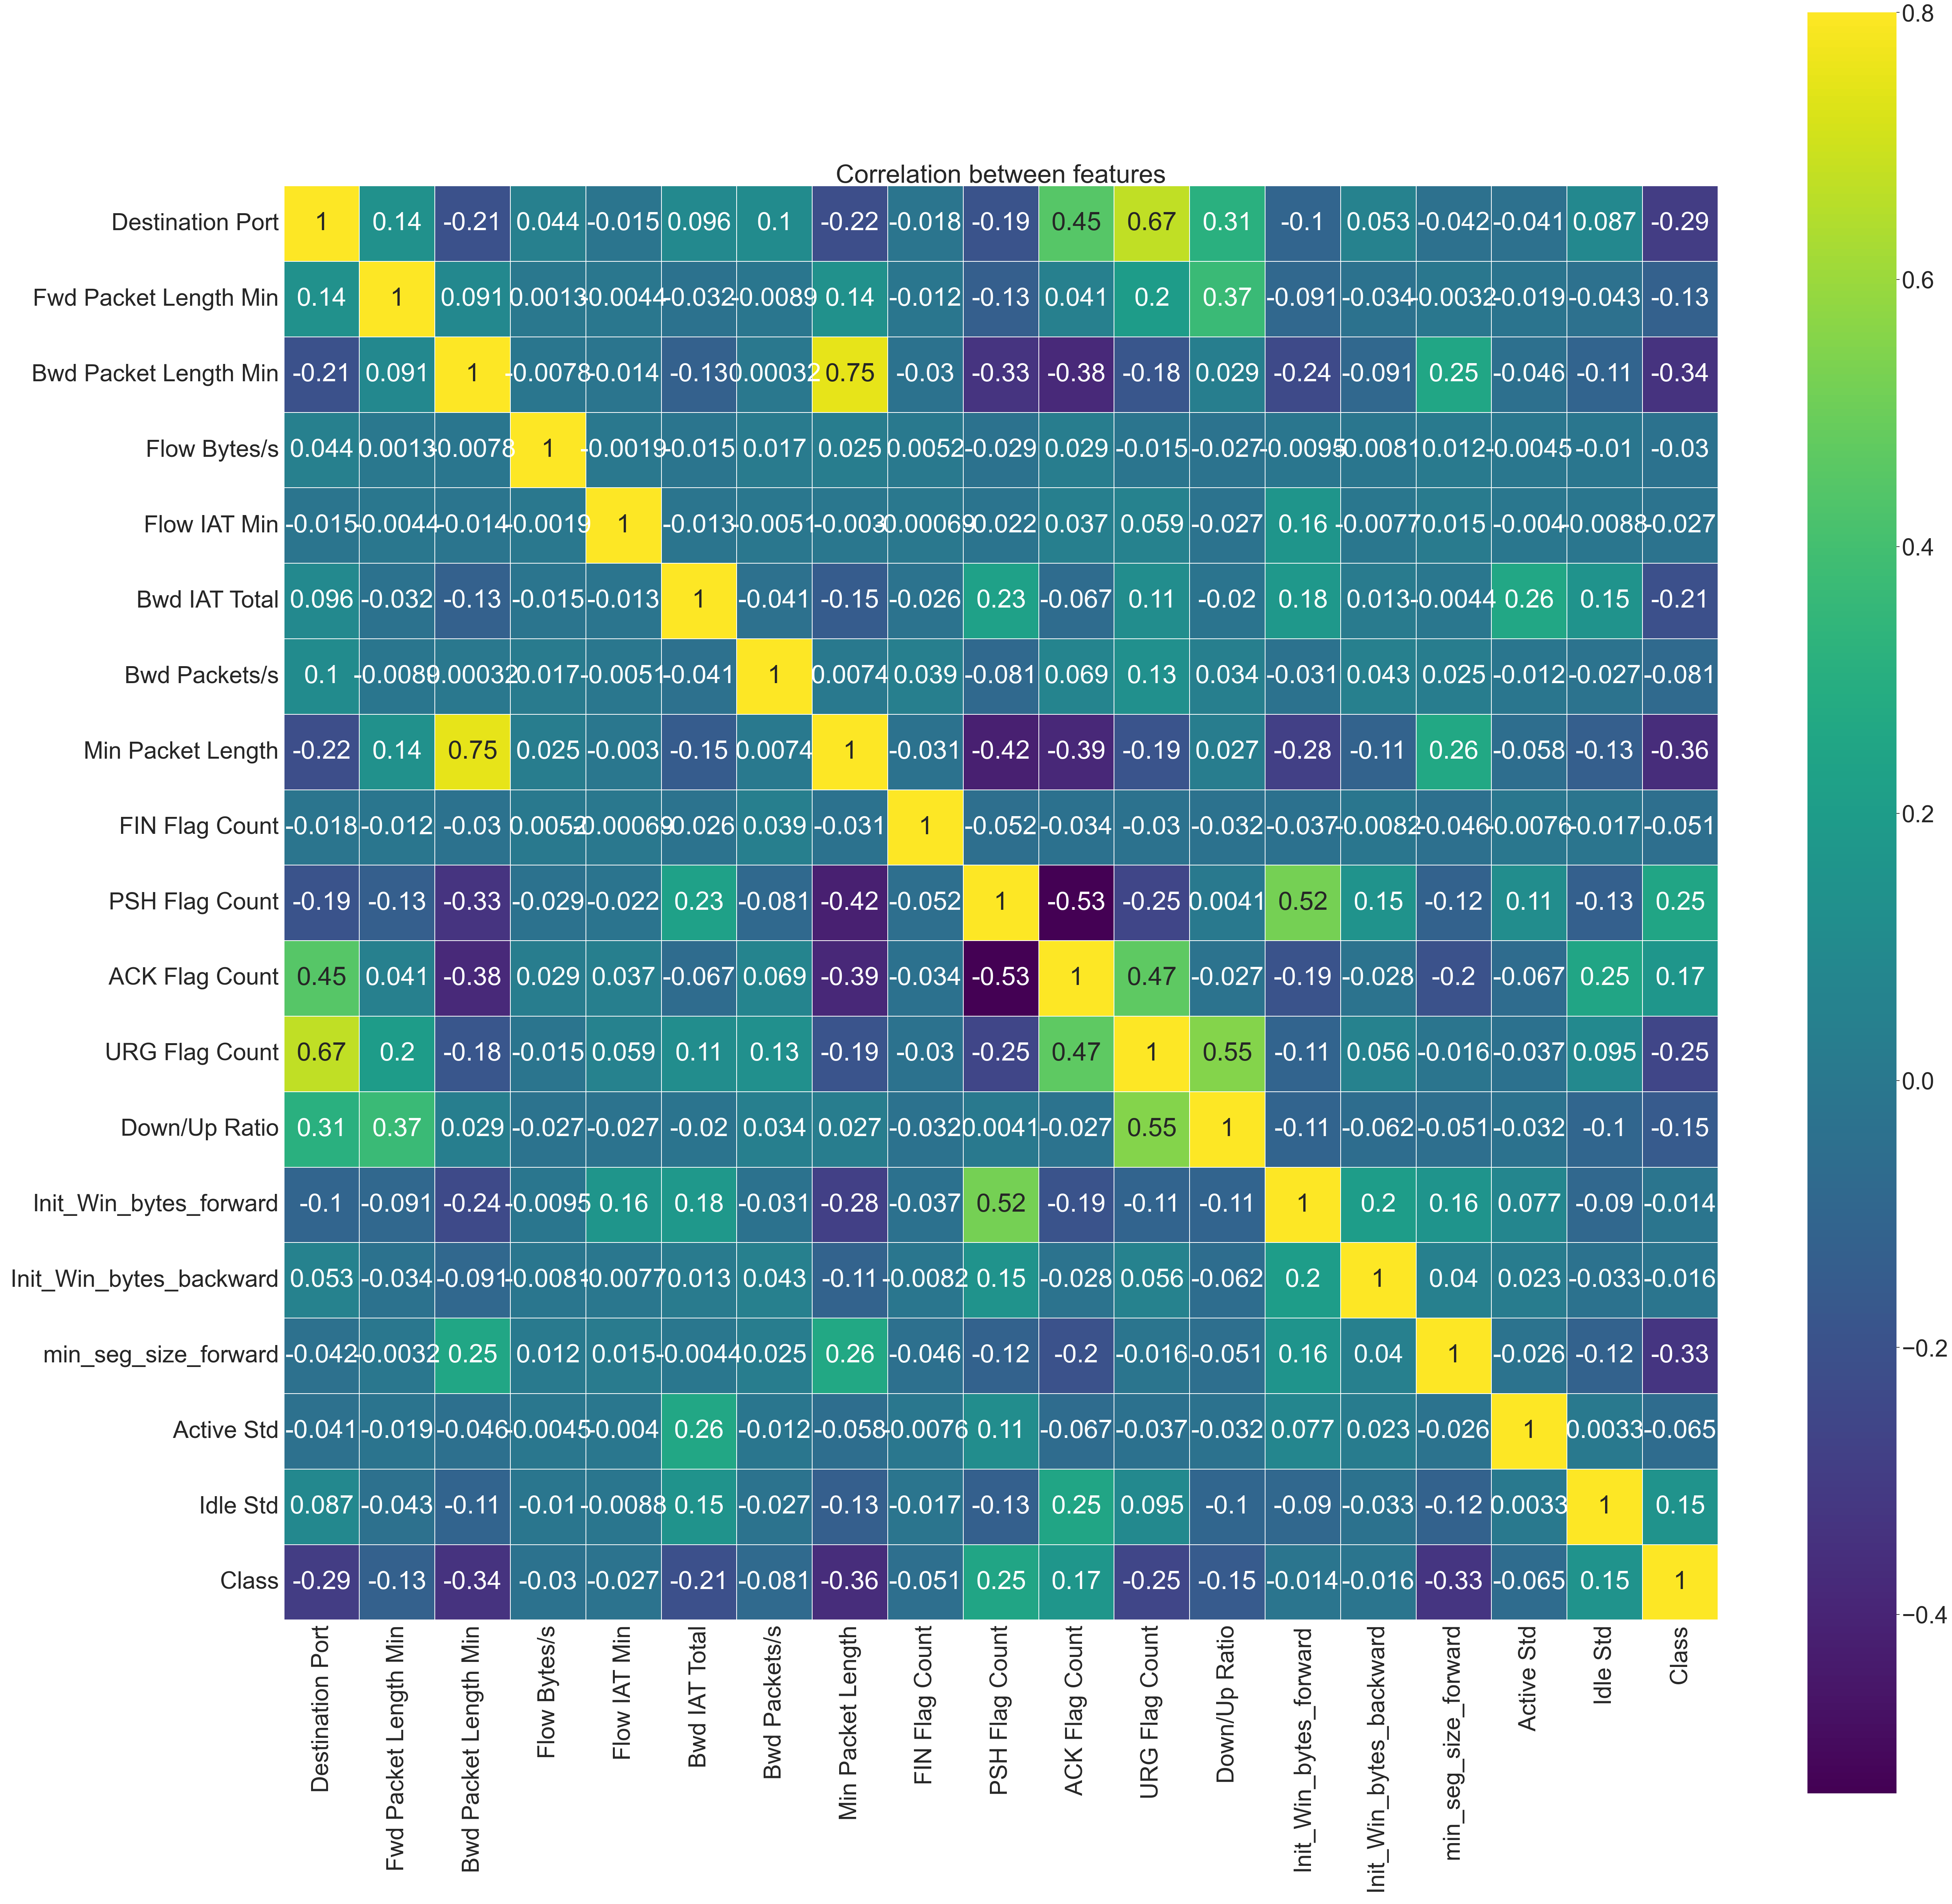

In [20]:
corr_matrix = df.corr()
sns.set(font_scale=4)
plt.figure(figsize=(60, 60))

sns.heatmap(corr_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features')

In [21]:
df.isna().sum()

 Destination Port           0
 Fwd Packet Length Min      0
 Bwd Packet Length Min      0
Flow Bytes/s                0
 Flow IAT Min               0
Bwd IAT Total               0
 Bwd Packets/s              0
 Min Packet Length          0
FIN Flag Count              0
 PSH Flag Count             0
 ACK Flag Count             0
 URG Flag Count             0
 Down/Up Ratio              0
Init_Win_bytes_forward      0
 Init_Win_bytes_backward    0
 min_seg_size_forward       0
 Active Std                 0
 Idle Std                   0
Class                       0
dtype: int64

## Train Test Split and Scaling 

In [22]:
y = df['Class']
X = df.drop('Class', axis=1)

In [23]:
y

0          1
1          0
2          0
3          0
4          0
          ..
1188328    0
1188329    0
1188330    0
1188331    1
1188332    0
Name: Class, Length: 1188262, dtype: int64

In [24]:
X

Destination Port   Fwd Packet Length Min   Bwd Packet Length Min  \
0                       80                       6                       0   
1                      443                       0                       0   
2                      443                       0                       0   
3                      443                       0                       0   
4                       53                      52                      68   
...                    ...                     ...                     ...   
1188328                138                     233                       0   
1188329              50898                       6                       6   
1188330                 53                      23                      23   
1188331                 80                       6                       0   
1188332                 80                       0                       0   

         Flow Bytes/s   Flow IAT Min  Bwd IAT Total   Bwd Packets/s  \
0        3.040770e+00              3              0        0.000000   
1        1.594907e+05              1         120711      138.868725   
2        7.255914e+01             63       61100000        0.196194   
3        4.911165e+01             19      111000000        0.162831   
4        1.297297e+06              3             49    10810.810810   
...               ...            ...            ...             ...   
1188328  1.320000e+08              1              0        0.000000   
1188329  5.007722e+00              1        7188843        0.695517   
1188330  6.013072e+05              1              1    13071.895420   
1188331  1.926211e+01              1              0        0.000000   
1188332  1.612762e+01             15          24492        0.027335   

          Min Packet Length  FIN Flag Count   PSH Flag Count   ACK Flag Count  \
0                         6               0                0                1   
1                         0               0                1                0   
2                         0               0                1                0   
3                         0               0                1                0   
4                        52               0                0                0   
...                     ...             ...              ...              ...   
1188328                 233               0                0                0   
1188329                   6               0                0                1   
1188330                  23               0                0                0   
1188331                   6               0                0                1   
1188332                   0               0                1                0   

          URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
0                      0               0                     256   
1                      0               0                   65535   
2                      0               0                    8192   
3                      0               1                    8192   
4                      0               1                      -1   
...                  ...             ...                     ...   
1188328                0               0                      -1   
1188329                1               5                     229   
1188330                0               1                      -1   
1188331                0               0                     256   
1188332                0               0                   65535   

          Init_Win_bytes_backward   min_seg_size_forward   Active Std  \
0                              -1                     20       0.0000   
1                             349                     32       0.0000   
2                             115                     20  152989.5108   
3                              63                     20  133115.4997   
4                              -1                     20       0.

## Normalization of Data

In [25]:
X = pd.DataFrame(X, columns=X.columns)
threshold = 1000
X = X.clip(lower=-threshold, upper=threshold)




# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Classes of Model

### Decision Tree Classifier

In [27]:
# Define and train a decision tree classifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_pred = dtc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', cm)

Accuracy: 0.9695522463423563
Confusion matrix: [[153882   5878      0      0      0]
 [    21  76535      0      0      0]
 [   950      0      0      0      0]
 [    15      0      0      0      0]
 [   359     13      0      0      0]]


### RandomizedSearchCV to find optimal hyperparameters

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the decision tree model
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
params = {'max_depth': randint(2, 10),
          'min_samples_split': randint(2, 10),
          'min_samples_leaf': randint(1, 5)}

# Use RandomizedSearchCV to find the best hyperparameters
with parallel_backend('multiprocessing', n_jobs=4):
    random_search = RandomizedSearchCV(model, params, cv=5, n_iter=50, random_state=42)
    random_search.fit(X_train, y_train)

    

# Train the model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [30]:
y_pred = best_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', cm)

Accuracy: 0.9970419056355274
Confusion matrix: [[159641     19     96      4      0]
 [   148  76408      0      0      0]
 [    59      0    889      2      0]
 [     0      0      0      9      6]
 [    30      0    339      0      3]]


### Learning Curve

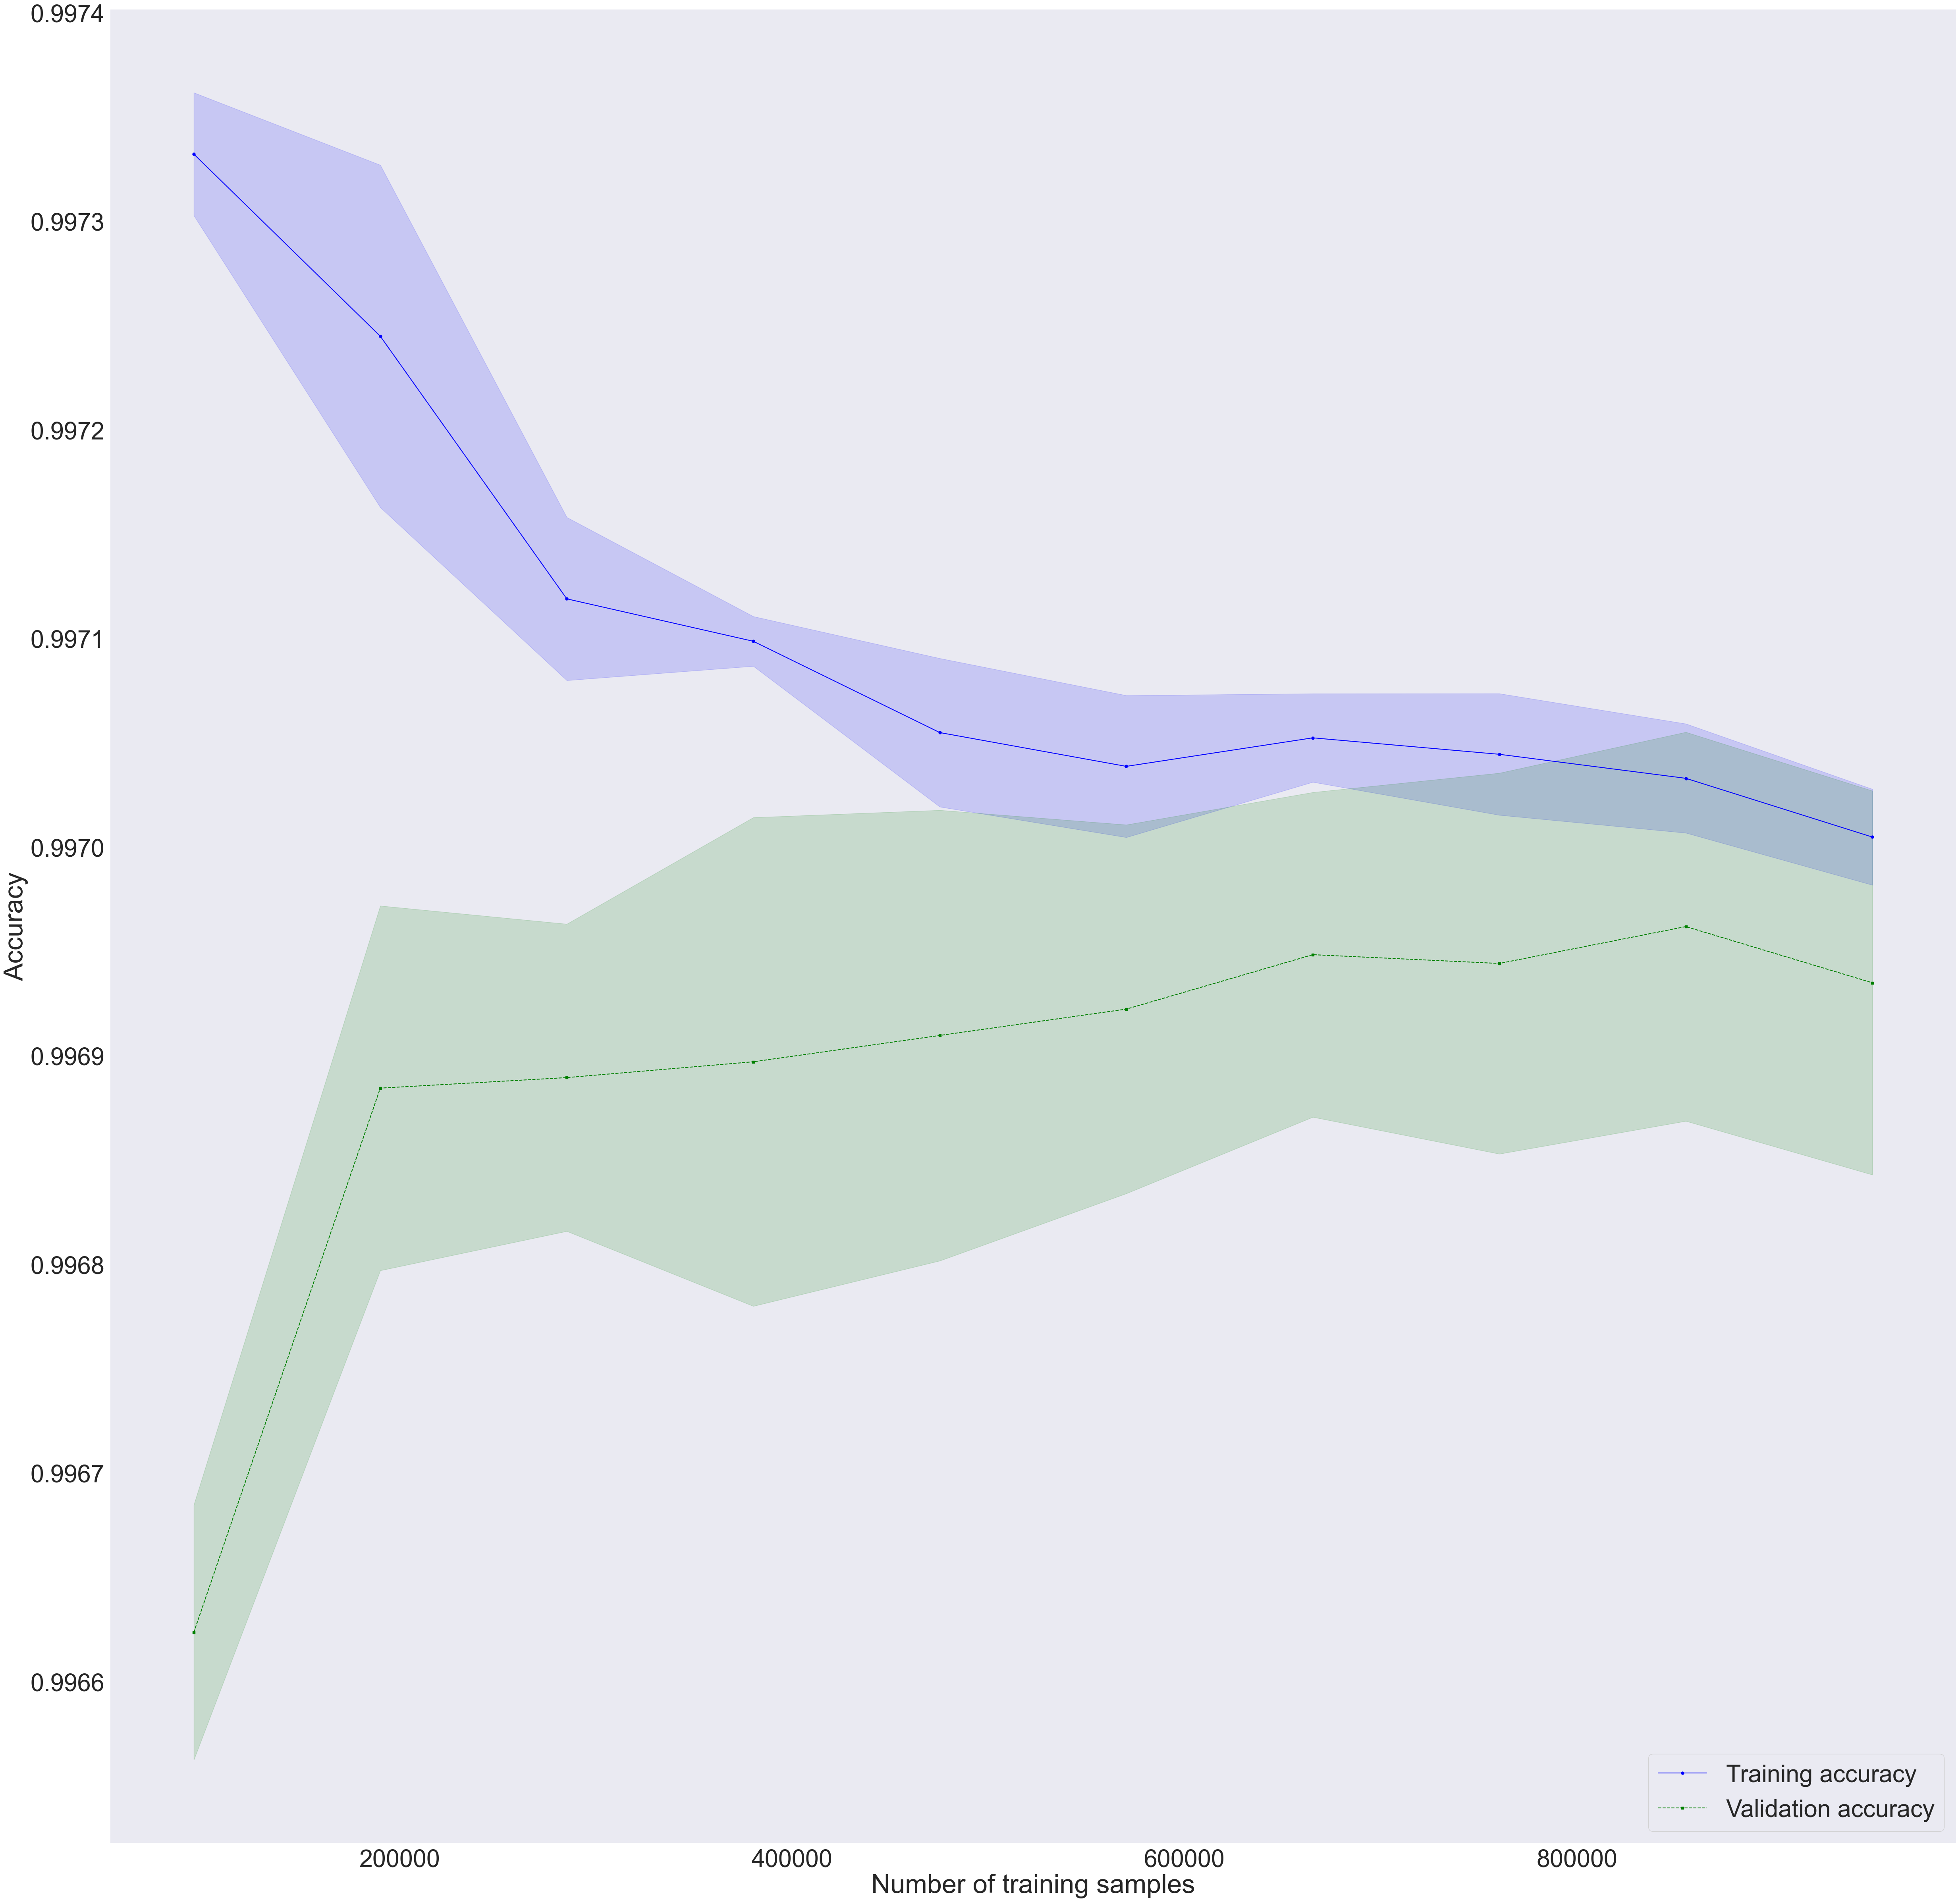

In [31]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(60, 60))

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.xlim([0,50000])
# plt.ylim([0.8, 1.0])
# plt.tight_layout()
plt.show()

### Confusion Matrix

<AxesSubplot:>

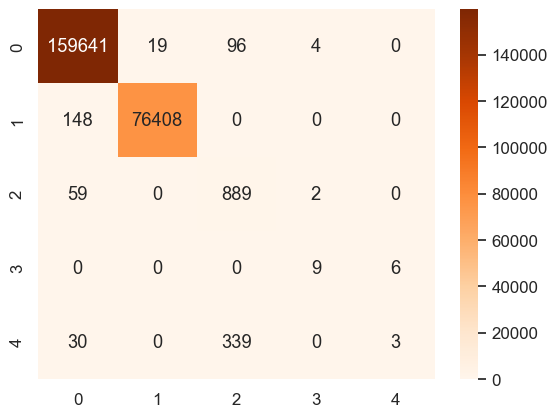

In [32]:
import seaborn as sns
sns.set(font_scale=1.10)
sns.heatmap(cm, annot=True, cmap='Oranges', fmt = 'd')


### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Calculate the average cross-validation score
avg_cv_score = np.mean(cv_scores)

cv_scores

array([0.99684413, 0.9970177 , 0.99694407, 0.99697037, 0.99688619])

In [34]:
avg_cv_score

0.9969324927006801

### Random Forest Classifier

In [35]:
# Train a random forest classifier on the training set
rfc = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 94.53%


### Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9557884815255856


### Logistic Regression Classifier

In [37]:
lrc = LogisticRegression(random_state=42, multi_class='ovr', max_iter = 10000)
lrc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = lrc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 97.78%


## Feature Selection

In [38]:
from sklearn.feature_selection import RFE



# Initialize the RFE with a step size of 1
rfe = RFE(lrc, step=1)

# Fit the RFE to the data
rfe.fit(X, y)

# Print the ranking of each feature
print("Feature ranking:", rfe.ranking_)

Feature ranking: [ 1  1  7  1  4  5  8  9 10  1  1  1  1  2  3  1  1  6]


### XGBoost Classifier

In [39]:
xgc = XGBClassifier(random_state=42, max_depth=2)
xgc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = xgc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.74%
